In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import learning_curve

In [2]:
df = pd.read_csv("D:\Fall2023\Research methods\COVID-19 Survey Student Responses.csv")
print (df.shape)
df.head()

(1182, 19)


,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling


 ### <span style='color: blue;'> Explanation</span>

1. Replace 'No tv', 'n', 'N', and empty spaces in the 'Time spent on TV' column with 0.
2. Convert the 'Time spent on TV' column to float data type.
3. Replace 'None ' with 'None' and 'Whatsapp' with 'WhatsApp' in the 'Prefered social media platform' column.


In [3]:
df['Time spent on TV'].replace('No tv', 0, inplace=True)
df['Time spent on TV'].replace('n', 0, inplace=True)
df['Time spent on TV'].replace('N', 0, inplace=True)
df['Time spent on TV'].replace(' ', 0, inplace=True)
df['Time spent on TV'] = df['Time spent on TV'].astype('float')
df['Prefered social media platform'] = df['Prefered social media platform'].replace('None ', 'None')
df['Prefered social media platform'] = df['Prefered social media platform'].replace('Whatsapp', 'WhatsApp')

In [4]:
#  renaming specific columns for easy use

df.rename(columns = {"Health issue during lockdown":"Mental Health"}, inplace = True)
df.rename(columns = {"Do you find yourself more connected with your family, close friends , relatives  ?":"Connected to family"}, inplace = True)
df.rename(columns = {"Time spent on Online Class":"class time"}, inplace = True)
df.rename(columns = {"Time spent on self study":"Self Study time"}, inplace = True)
df.rename(columns = {"Time spent on fitness":"Fitness time"}, inplace = True)
df.rename(columns = {"Time spent on sleep":"Sleep time"}, inplace = True)
df.rename(columns = {"Age of Subject":"Age"}, inplace = True)
df.rename(columns = {"Time spent on social media":"Social Media time"}, inplace = True)
df.rename(columns = {"Number of meals per day":"Meal"}, inplace = True)
df.rename(columns = {"Change in your weight":"Weight change"}, inplace = True)
df.rename(columns = {"Region of residence":"Residence"}, inplace = True)
df.rename(columns = {"Rating of Online Class experience":"Rating Online Cls Exp"}, inplace = True)
df.rename(columns = {"Medium for online class":"Medium"}, inplace = True)
df.rename(columns = {"What you miss the most":"Missed the Most"}, inplace = True)

In [5]:
df=df.dropna() #dropping null values

In [6]:
df.isnull().any()   # checking if there are any null values in a DataFrame

ID                                False
Residence                         False
Age                               False
class time                        False
Rating Online Cls Exp             False
Medium                            False
Self Study time                   False
Fitness time                      False
Sleep time                        False
Social Media time                 False
Prefered social media platform    False
Time spent on TV                  False
Meal                              False
Weight change                     False
Mental Health                     False
Stress busters                    False
Time utilized                     False
Connected to family               False
Missed the Most                   False
dtype: bool

#####  Extracting specific columns from a DataFrame (df) and assigns them to a new variable model_data

In [7]:
model_data=df[['Residence','Age','class time','Rating Online Cls Exp','Medium','Self Study time','Fitness time','Social Media time','Prefered social media platform','Time spent on TV','Meal','Weight change','Time utilized','Connected to family','Mental Health']]

##### One-hot encoding is used to convert categorical variables into numeric values.


In [8]:
data_encoded=pd.get_dummies(data=model_data,drop_first=True)
data_encoded.head()

,Age,class time,Self Study time,Fitness time,Social Media time,Time spent on TV,Meal,Residence_Outside Delhi-NCR,Rating Online Cls Exp_Excellent,Rating Online Cls Exp_Good,...,Prefered social media platform_Talklife,Prefered social media platform_Telegram,Prefered social media platform_Twitter,Prefered social media platform_WhatsApp,Prefered social media platform_Youtube,Weight change_Increased,Weight change_Remain Constant,Time utilized_YES,Connected to family_YES,Mental Health_YES
0,21,2.0,4.0,0.0,3.0,1.0,4,0,0,1,...,0,0,0,0,0,1,0,1,1,0
1,21,0.0,0.0,2.0,3.0,0.0,3,0,1,0,...,0,0,0,0,1,0,0,1,0,0
2,20,7.0,3.0,0.0,2.0,0.0,3,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,20,3.0,2.0,1.0,5.0,0.0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,21,3.0,3.0,1.0,3.0,1.0,4,0,0,1,...,0,0,0,0,0,0,1,0,0,0


#### Selecting specific features from the dataset for analysis. The features are divided into two sets: X and y.

####  X contains the input features, and y contains the corresponding output or target variable that the model will learn to predict


In [9]:
 X=data_encoded[['Age', 'class time', 'Self Study time', 'Fitness time',
       'Social Media time', 'Time spent on TV', 'Meal',
       'Residence_Outside Delhi-NCR', 'Rating Online Cls Exp_Excellent',
       'Rating Online Cls Exp_Good', 'Rating Online Cls Exp_Poor',
       'Rating Online Cls Exp_Very poor', 'Medium_Laptop/Desktop',
       'Medium_Smartphone', 'Medium_Smartphone or Laptop/Desktop',
       'Medium_Tablet', 'Prefered social media platform_Facebook',
       'Prefered social media platform_Instagram',
       'Prefered social media platform_Linkedin',
       'Prefered social media platform_None',
       'Prefered social media platform_Quora',
       'Prefered social media platform_Reddit',
       'Prefered social media platform_Snapchat',
       'Prefered social media platform_Talklife',
       'Prefered social media platform_Telegram',
       'Prefered social media platform_Twitter',
       'Prefered social media platform_WhatsApp',
       'Prefered social media platform_Youtube', 'Weight change_Increased',
       'Weight change_Remain Constant', 'Time utilized_YES',
       'Connected to family_YES']]
 y=data_encoded['Mental Health_YES']
print(X.head())
print(y.head())

   Age  class time  Self Study time  Fitness time  Social Media time  \
0   21         2.0              4.0           0.0                3.0   
1   21         0.0              0.0           2.0                3.0   
2   20         7.0              3.0           0.0                2.0   
3   20         3.0              2.0           1.0                5.0   
4   21         3.0              3.0           1.0                3.0   

   Time spent on TV  Meal  Residence_Outside Delhi-NCR  \
0               1.0     4                            0   
1               0.0     3                            0   
2               0.0     3                            0   
3               0.0     3                            0   
4               1.0     4                            0   

   Rating Online Cls Exp_Excellent  Rating Online Cls Exp_Good  ...  \
0                                0                           1  ...   
1                                1                           0  ...   
2    

In [10]:
# Total number of samples in dataset

print("X: ",X.shape)
print("y: ",y.shape)

X:  (1131, 32)
y:  (1131,)


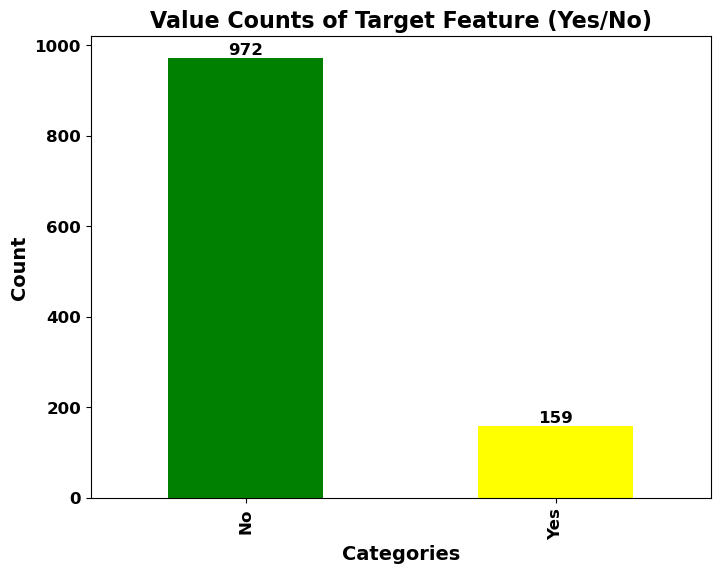

In [11]:
import matplotlib.pyplot as plt
y.replace({0: 'No', 1: 'Yes'}, inplace=True)
value_counts = y.value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
colors = ['Green', 'yellow']  # Define colors for 'Yes' and 'No'
value_counts.plot(kind='bar', color=colors)

# Plot the bar graph
for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add labels and title with larger font size and bold
plt.xlabel('Categories', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Value Counts of Target Feature (Yes/No)', fontsize=16, fontweight='bold')

# Set the tick labels' font size and weight
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Show the plot
plt.show()

#### Standardization is a common technique used to rescale features by transforming them to have a mean of 0 and a standard deviation of 1. This helps in improving the performance of various ML algorithms.

In [12]:
X_new = X.copy()

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X[:5]
X = pd.DataFrame(X, columns=X_new.columns, 
                           index=X_new.index)

# <span style='color: Blue;'> Previous paper Results </span>

In [13]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)



[[293   8]
 [ 37   2]]
              precision    recall  f1-score   support

          No       0.89      0.97      0.93       301
         Yes       0.20      0.05      0.08        39

    accuracy                           0.87       340
   macro avg       0.54      0.51      0.51       340
weighted avg       0.81      0.87      0.83       340

86.76470588235294


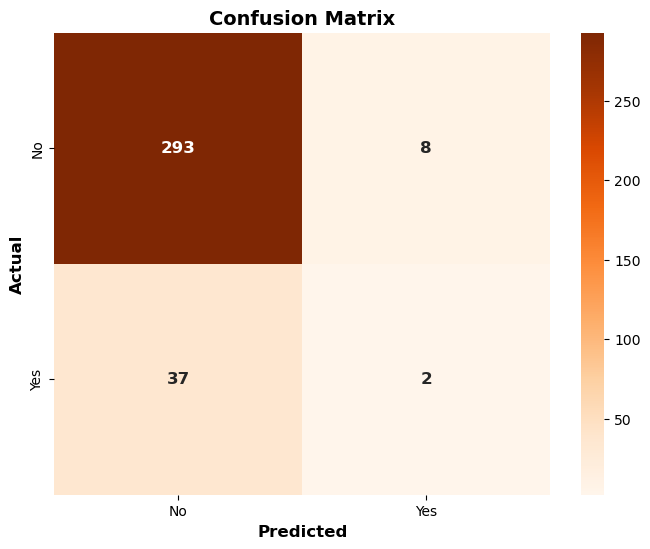

In [14]:
# Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, y_train)

# Generate predictions
predictions = lr.predict(X_test)

# Print confusion matrix and classification report
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(lr.score(X_test, y_test) * 100)
# Plotting the confusion matrix with 'Yes' and 'No' labels
conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))

# Define labels for 'Yes' and 'No'
class_names = ['No', 'Yes']

# Create a heatmap and specify the class names for the labels
sns.heatmap(conf_matrix, annot=True, cmap='Oranges', fmt='g', xticklabels=class_names, yticklabels=class_names, cbar=True,annot_kws={"size": 12, "weight": "bold"})

plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Predicted', fontsize=12, fontweight='bold')
plt.ylabel('Actual', fontsize=12, fontweight='bold')
plt.show()

In [15]:
# Random Forest Model

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
print(confusion_matrix(y_test, clf.predict(X_test)))
print(classification_report(y_test, clf.predict(X_test)))
clf.score(X_test, y_test)*100


[[301   0]
 [ 37   2]]
              precision    recall  f1-score   support

          No       0.89      1.00      0.94       301
         Yes       1.00      0.05      0.10        39

    accuracy                           0.89       340
   macro avg       0.95      0.53      0.52       340
weighted avg       0.90      0.89      0.85       340



89.11764705882354

# <span style='color:Blue ;'> Our approach to improving results starts from here </span>

## <span style='color: Magenta;'> Undersampling</span>

In [16]:
data_encoded.head()

,Age,class time,Self Study time,Fitness time,Social Media time,Time spent on TV,Meal,Residence_Outside Delhi-NCR,Rating Online Cls Exp_Excellent,Rating Online Cls Exp_Good,...,Prefered social media platform_Talklife,Prefered social media platform_Telegram,Prefered social media platform_Twitter,Prefered social media platform_WhatsApp,Prefered social media platform_Youtube,Weight change_Increased,Weight change_Remain Constant,Time utilized_YES,Connected to family_YES,Mental Health_YES
0,21,2.0,4.0,0.0,3.0,1.0,4,0,0,1,...,0,0,0,0,0,1,0,1,1,No
1,21,0.0,0.0,2.0,3.0,0.0,3,0,1,0,...,0,0,0,0,1,0,0,1,0,No
2,20,7.0,3.0,0.0,2.0,0.0,3,0,0,0,...,0,0,0,0,0,0,1,0,1,No
3,20,3.0,2.0,1.0,5.0,0.0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,No
4,21,3.0,3.0,1.0,3.0,1.0,4,0,0,1,...,0,0,0,0,0,0,1,0,0,No


In [17]:
# Map 'No' to 0 and 'Yes' to 1
data_encoded['Mental Health_YES'] = data_encoded['Mental Health_YES'].map({'No': 0, 'Yes': 1})


In [18]:
from sklearn.utils import resample


# Separate the majority and minority classes
majority_class = data_encoded[data_encoded['Mental Health_YES'] == 0]
minority_class = data_encoded[data_encoded['Mental Health_YES'] == 1]

# Downsample the majority class to match the size of the minority class
majority_downsampled = resample(majority_class, replace=False, n_samples=len(minority_class), random_state=42)

# Combine the downsampled majority class with the minority class
df_downsampled = pd.concat([majority_downsampled, minority_class])


df_downsampled

,Age,class time,Self Study time,Fitness time,Social Media time,Time spent on TV,Meal,Residence_Outside Delhi-NCR,Rating Online Cls Exp_Excellent,Rating Online Cls Exp_Good,...,Prefered social media platform_Talklife,Prefered social media platform_Telegram,Prefered social media platform_Twitter,Prefered social media platform_WhatsApp,Prefered social media platform_Youtube,Weight change_Increased,Weight change_Remain Constant,Time utilized_YES,Connected to family_YES,Mental Health_YES
956,20,5.0,5.0,0.0,3.0,0.0,2,0,0,1,...,0,0,0,0,1,0,1,1,0,0
94,20,2.0,3.0,1.0,4.0,1.0,3,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1062,30,2.0,0.0,1.0,1.0,8.0,4,1,0,0,...,0,0,0,0,1,1,0,0,0,0
615,20,1.0,3.0,1.0,3.0,2.0,4,1,0,1,...,0,0,0,0,1,0,1,1,1,0
811,34,2.0,1.0,1.0,4.0,2.0,3,0,0,0,...,0,0,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,19,4.0,3.0,0.0,4.0,0.0,2,0,0,0,...,0,0,0,0,1,1,0,0,0,1
1049,33,4.0,2.0,1.0,4.0,1.0,3,0,0,0,...,0,0,0,0,1,1,0,1,1,1
1071,16,8.0,1.0,0.3,0.0,0.0,2,1,0,0,...,0,1,0,0,0,1,0,0,0,1
1114,12,4.0,2.0,1.0,0.0,2.0,2,0,1,0,...,0,0,0,0,1,0,1,1,1,1


In [19]:
X=df_downsampled[['Age', 'class time', 'Self Study time', 'Fitness time',
       'Social Media time', 'Time spent on TV', 'Meal',
       'Residence_Outside Delhi-NCR', 'Rating Online Cls Exp_Excellent',
       'Rating Online Cls Exp_Good', 'Rating Online Cls Exp_Poor',
       'Rating Online Cls Exp_Very poor', 'Medium_Laptop/Desktop',
       'Medium_Smartphone', 'Medium_Smartphone or Laptop/Desktop',
       'Medium_Tablet', 'Prefered social media platform_Facebook',
       'Prefered social media platform_Instagram',
       'Prefered social media platform_Linkedin',
       'Prefered social media platform_None',
       'Prefered social media platform_Quora',
       'Prefered social media platform_Reddit',
       'Prefered social media platform_Snapchat',
       'Prefered social media platform_Talklife',
       'Prefered social media platform_Telegram',
       'Prefered social media platform_Twitter',
       'Prefered social media platform_WhatsApp',
       'Prefered social media platform_Youtube', 'Weight change_Increased',
       'Weight change_Remain Constant', 'Time utilized_YES',
       'Connected to family_YES']]
y=df_downsampled['Mental Health_YES']
print(X.head())
print(y.head())

      Age  class time  Self Study time  Fitness time  Social Media time  \
956    20         5.0              5.0           0.0                3.0   
94     20         2.0              3.0           1.0                4.0   
1062   30         2.0              0.0           1.0                1.0   
615    20         1.0              3.0           1.0                3.0   
811    34         2.0              1.0           1.0                4.0   

      Time spent on TV  Meal  Residence_Outside Delhi-NCR  \
956                0.0     2                            0   
94                 1.0     3                            0   
1062               8.0     4                            1   
615                2.0     4                            1   
811                2.0     3                            0   

      Rating Online Cls Exp_Excellent  Rating Online Cls Exp_Good  ...  \
956                                 0                           1  ...   
94                                

In [20]:
print("X: ",X.shape)
print("y: ",y.shape)

X:  (318, 32)
y:  (318,)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [22]:
# Logistic Regression


lr = LogisticRegression()
lr.fit(X_train, y_train)

print(confusion_matrix(y_test, lr.predict(X_test)))
print(classification_report(y_test, lr.predict(X_test)))
print(lr.score(X_test, y_test)*100)


[[27 19]
 [14 36]]
              precision    recall  f1-score   support

           0       0.66      0.59      0.62        46
           1       0.65      0.72      0.69        50

    accuracy                           0.66        96
   macro avg       0.66      0.65      0.65        96
weighted avg       0.66      0.66      0.65        96

65.625


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
print(confusion_matrix(y_test, clf.predict(X_test)))
print(classification_report(y_test, clf.predict(X_test)))
print("Accuracy: ",clf.score(X_test, y_test)*100)

[[26 20]
 [15 35]]
              precision    recall  f1-score   support

           0       0.63      0.57      0.60        46
           1       0.64      0.70      0.67        50

    accuracy                           0.64        96
   macro avg       0.64      0.63      0.63        96
weighted avg       0.64      0.64      0.63        96

Accuracy:  63.541666666666664


In [24]:
# AdaBoost

adaboost_model = AdaBoostClassifier()

adaboost_model.fit(X_train, y_train)

adaboost_predictions = adaboost_model.predict(X_test)

adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)
adaboost_conf_matrix = confusion_matrix(y_test, adaboost_predictions)
adaboost_classification_report = classification_report(y_test, adaboost_predictions)

print("AdaBoost Confusion Matrix:")
print(adaboost_conf_matrix)

print("\nAdaBoost Classification Report:")
print(adaboost_classification_report)

print("\nAdaBoost Accuracy:", adaboost_accuracy * 100)


AdaBoost Confusion Matrix:
[[23 23]
 [14 36]]

AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.50      0.55        46
           1       0.61      0.72      0.66        50

    accuracy                           0.61        96
   macro avg       0.62      0.61      0.61        96
weighted avg       0.62      0.61      0.61        96


AdaBoost Accuracy: 61.458333333333336


In [25]:
# xgboost

import xgboost as xgb

xgboost_model = xgb.XGBClassifier()

xgboost_model.fit(X_train, y_train)

xgboost_predictions = xgboost_model.predict(X_test)

xgboost_accuracy = accuracy_score(y_test, xgboost_predictions)
xgboost_conf_matrix = confusion_matrix(y_test, xgboost_predictions)
xgboost_classification_report = classification_report(y_test, xgboost_predictions)

print("XGBoost Confusion Matrix:")
print(xgboost_conf_matrix)

print("\nXGBoost Classification Report:")
print(xgboost_classification_report)

print("\nXGBoost Accuracy:", xgboost_accuracy * 100)

XGBoost Confusion Matrix:
[[27 19]
 [17 33]]

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.59      0.60        46
           1       0.63      0.66      0.65        50

    accuracy                           0.62        96
   macro avg       0.62      0.62      0.62        96
weighted avg       0.62      0.62      0.62        96


XGBoost Accuracy: 62.5


In [26]:
from keras.models import Sequential
from keras.layers import Dense


# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an ANN model
ann_model = Sequential()
ann_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))

# Compile the model
ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
ann_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=0)

# Make predictions
ann_predictions = (ann_model.predict(X_test_scaled) > 0.5).astype(int).reshape(-1)

# Evaluate the model
ann_accuracy = accuracy_score(y_test, ann_predictions)
ann_conf_matrix = confusion_matrix(y_test, ann_predictions)
ann_classification_report = classification_report(y_test, ann_predictions)

# Print results
print("ANN Confusion Matrix:")
print(ann_conf_matrix)

print("\nANN Classification Report:")
print(ann_classification_report)

print("\nANN Accuracy:", ann_accuracy * 100)


3/3 [==============================] - 0s 13ms/step
ANN Confusion Matrix:
[[28 18]
 [16 34]]

ANN Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.61      0.62        46
           1       0.65      0.68      0.67        50

    accuracy                           0.65        96
   macro avg       0.65      0.64      0.64        96
weighted avg       0.65      0.65      0.65        96


ANN Accuracy: 64.58333333333334


# <span style='color: blue;'> Oversampling</span>

In [27]:
data_encoded

,Age,class time,Self Study time,Fitness time,Social Media time,Time spent on TV,Meal,Residence_Outside Delhi-NCR,Rating Online Cls Exp_Excellent,Rating Online Cls Exp_Good,...,Prefered social media platform_Talklife,Prefered social media platform_Telegram,Prefered social media platform_Twitter,Prefered social media platform_WhatsApp,Prefered social media platform_Youtube,Weight change_Increased,Weight change_Remain Constant,Time utilized_YES,Connected to family_YES,Mental Health_YES
0,21,2.0,4.0,0.0,3.0,1.0,4,0,0,1,...,0,0,0,0,0,1,0,1,1,0
1,21,0.0,0.0,2.0,3.0,0.0,3,0,1,0,...,0,0,0,0,1,0,0,1,0,0
2,20,7.0,3.0,0.0,2.0,0.0,3,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,20,3.0,2.0,1.0,5.0,0.0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,21,3.0,3.0,1.0,3.0,1.0,4,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,12,3.0,4.0,1.0,1.0,2.0,3,0,0,1,...,0,0,0,0,0,0,0,1,1,0
1178,14,6.0,4.0,1.0,1.0,1.0,4,0,0,0,...,0,0,0,1,0,0,1,1,1,0
1179,13,4.0,0.0,0.5,3.0,2.0,4,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1180,14,5.0,3.5,1.0,0.5,1.0,4,0,1,0,...,0,0,0,0,1,0,1,1,1,0


In [28]:
majority_class = data_encoded[data_encoded['Mental Health_YES'] == 0]
minority_class = data_encoded[data_encoded['Mental Health_YES'] == 1]

# Upsample the minority class to match the size of the majority class
minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

# Combine the upsampled minority class with the majority class
df_upsampled = pd.concat([majority_class, minority_upsampled])

df_upsampled.head()

,Age,class time,Self Study time,Fitness time,Social Media time,Time spent on TV,Meal,Residence_Outside Delhi-NCR,Rating Online Cls Exp_Excellent,Rating Online Cls Exp_Good,...,Prefered social media platform_Talklife,Prefered social media platform_Telegram,Prefered social media platform_Twitter,Prefered social media platform_WhatsApp,Prefered social media platform_Youtube,Weight change_Increased,Weight change_Remain Constant,Time utilized_YES,Connected to family_YES,Mental Health_YES
0,21,2.0,4.0,0.0,3.0,1.0,4,0,0,1,...,0,0,0,0,0,1,0,1,1,0
1,21,0.0,0.0,2.0,3.0,0.0,3,0,1,0,...,0,0,0,0,1,0,0,1,0,0
2,20,7.0,3.0,0.0,2.0,0.0,3,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,20,3.0,2.0,1.0,5.0,0.0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,21,3.0,3.0,1.0,3.0,1.0,4,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [29]:
X=df_upsampled[['Age', 'class time', 'Self Study time', 'Fitness time',
       'Social Media time', 'Time spent on TV', 'Meal',
       'Residence_Outside Delhi-NCR', 'Rating Online Cls Exp_Excellent',
       'Rating Online Cls Exp_Good', 'Rating Online Cls Exp_Poor',
       'Rating Online Cls Exp_Very poor', 'Medium_Laptop/Desktop',
       'Medium_Smartphone', 'Medium_Smartphone or Laptop/Desktop',
       'Medium_Tablet', 'Prefered social media platform_Facebook',
       'Prefered social media platform_Instagram',
       'Prefered social media platform_Linkedin',
       'Prefered social media platform_None',
       'Prefered social media platform_Quora',
       'Prefered social media platform_Reddit',
       'Prefered social media platform_Snapchat',
       'Prefered social media platform_Talklife',
       'Prefered social media platform_Telegram',
       'Prefered social media platform_Twitter',
       'Prefered social media platform_WhatsApp',
       'Prefered social media platform_Youtube', 'Weight change_Increased',
       'Weight change_Remain Constant', 'Time utilized_YES',
       'Connected to family_YES']]
y=df_upsampled['Mental Health_YES']
print(X.head())
print(y.head())

   Age  class time  Self Study time  Fitness time  Social Media time  \
0   21         2.0              4.0           0.0                3.0   
1   21         0.0              0.0           2.0                3.0   
2   20         7.0              3.0           0.0                2.0   
3   20         3.0              2.0           1.0                5.0   
4   21         3.0              3.0           1.0                3.0   

   Time spent on TV  Meal  Residence_Outside Delhi-NCR  \
0               1.0     4                            0   
1               0.0     3                            0   
2               0.0     3                            0   
3               0.0     3                            0   
4               1.0     4                            0   

   Rating Online Cls Exp_Excellent  Rating Online Cls Exp_Good  ...  \
0                                0                           1  ...   
1                                1                           0  ...   
2    

In [30]:
print("X: ",X.shape)
print("y: ",y.shape)

X:  (1944, 32)
y:  (1944,)


In [31]:
X_new = X.copy()

In [32]:
sc=StandardScaler()
X=sc.fit_transform(X)
X[:5]
X = pd.DataFrame(X, columns=X_new.columns, 
                           index=X_new.index)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [34]:
# Logistic Regression Model

lr = LogisticRegression()
lr.fit(X_train, y_train)

print(confusion_matrix(y_test, lr.predict(X_test)))
print(classification_report(y_test, lr.predict(X_test)))
print(lr.score(X_test, y_test)*100)


[[190  93]
 [ 96 205]]
              precision    recall  f1-score   support

           0       0.66      0.67      0.67       283
           1       0.69      0.68      0.68       301

    accuracy                           0.68       584
   macro avg       0.68      0.68      0.68       584
weighted avg       0.68      0.68      0.68       584

67.63698630136986


In [35]:
# Random forest

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
print(confusion_matrix(y_test, clf.predict(X_test)))
print(classification_report(y_test, clf.predict(X_test)))
clf.score(X_test, y_test)*100

[[270  13]
 [ 10 291]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       283
           1       0.96      0.97      0.96       301

    accuracy                           0.96       584
   macro avg       0.96      0.96      0.96       584
weighted avg       0.96      0.96      0.96       584



96.06164383561644

In [36]:
# AdaBoost

adaboost_model = AdaBoostClassifier()

adaboost_model.fit(X_train, y_train)

adaboost_predictions = adaboost_model.predict(X_test)

adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)
adaboost_conf_matrix = confusion_matrix(y_test, adaboost_predictions)
adaboost_classification_report = classification_report(y_test, adaboost_predictions)

print("AdaBoost Confusion Matrix:")
print(adaboost_conf_matrix)

print("\nAdaBoost Classification Report:")
print(adaboost_classification_report)

print("\nAdaBoost Accuracy:", adaboost_accuracy * 100)


AdaBoost Confusion Matrix:
[[189  94]
 [ 92 209]]

AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       283
           1       0.69      0.69      0.69       301

    accuracy                           0.68       584
   macro avg       0.68      0.68      0.68       584
weighted avg       0.68      0.68      0.68       584


AdaBoost Accuracy: 68.15068493150685


In [37]:
# xgboost

import xgboost as xgb

xgboost_model = xgb.XGBClassifier()

xgboost_model.fit(X_train, y_train)

xgboost_predictions = xgboost_model.predict(X_test)

xgboost_accuracy = accuracy_score(y_test, xgboost_predictions)
xgboost_conf_matrix = confusion_matrix(y_test, xgboost_predictions)
xgboost_classification_report = classification_report(y_test, xgboost_predictions)

print("XGBoost Confusion Matrix:")
print(xgboost_conf_matrix)

print("\nXGBoost Classification Report:")
print(xgboost_classification_report)

print("\nXGBoost Accuracy:", xgboost_accuracy * 100)

XGBoost Confusion Matrix:
[[251  32]
 [ 10 291]]

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       283
           1       0.90      0.97      0.93       301

    accuracy                           0.93       584
   macro avg       0.93      0.93      0.93       584
weighted avg       0.93      0.93      0.93       584


XGBoost Accuracy: 92.8082191780822


In [38]:
# ANN


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an ANN model
ann_model = Sequential()
ann_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))

# Compile the model
ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
ann_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=0)

# Make predictions
ann_predictions = (ann_model.predict(X_test_scaled) > 0.5).astype(int).reshape(-1)

# Evaluate the model
ann_accuracy = accuracy_score(y_test, ann_predictions)
ann_conf_matrix = confusion_matrix(y_test, ann_predictions)
ann_classification_report = classification_report(y_test, ann_predictions)

# Print results
print("ANN Confusion Matrix:")
print(ann_conf_matrix)

print("\nANN Classification Report:")
print(ann_classification_report)

print("\nANN Accuracy:", ann_accuracy * 100)


19/19 [==============================] - 0s 4ms/step
ANN Confusion Matrix:
[[218  65]
 [ 54 247]]

ANN Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       283
           1       0.79      0.82      0.81       301

    accuracy                           0.80       584
   macro avg       0.80      0.80      0.80       584
weighted avg       0.80      0.80      0.80       584


ANN Accuracy: 79.62328767123287


### <span style='color: blue;'> SMOTE Method</span>

In [39]:
X=data_encoded[['Age', 'class time', 'Self Study time', 'Fitness time',
       'Social Media time', 'Time spent on TV', 'Meal',
       'Residence_Outside Delhi-NCR', 'Rating Online Cls Exp_Excellent',
       'Rating Online Cls Exp_Good', 'Rating Online Cls Exp_Poor',
       'Rating Online Cls Exp_Very poor', 'Medium_Laptop/Desktop',
       'Medium_Smartphone', 'Medium_Smartphone or Laptop/Desktop',
       'Medium_Tablet', 'Prefered social media platform_Facebook',
       'Prefered social media platform_Instagram',
       'Prefered social media platform_Linkedin',
       'Prefered social media platform_None',
       'Prefered social media platform_Quora',
       'Prefered social media platform_Reddit',
       'Prefered social media platform_Snapchat',
       'Prefered social media platform_Talklife',
       'Prefered social media platform_Telegram',
       'Prefered social media platform_Twitter',
       'Prefered social media platform_WhatsApp',
       'Prefered social media platform_Youtube', 'Weight change_Increased',
       'Weight change_Remain Constant', 'Time utilized_YES',
       'Connected to family_YES']]
y=data_encoded['Mental Health_YES']
print(X.head())
print(y.head())

   Age  class time  Self Study time  Fitness time  Social Media time  \
0   21         2.0              4.0           0.0                3.0   
1   21         0.0              0.0           2.0                3.0   
2   20         7.0              3.0           0.0                2.0   
3   20         3.0              2.0           1.0                5.0   
4   21         3.0              3.0           1.0                3.0   

   Time spent on TV  Meal  Residence_Outside Delhi-NCR  \
0               1.0     4                            0   
1               0.0     3                            0   
2               0.0     3                            0   
3               0.0     3                            0   
4               1.0     4                            0   

   Rating Online Cls Exp_Excellent  Rating Online Cls Exp_Good  ...  \
0                                0                           1  ...   
1                                1                           0  ...   
2    

In [40]:
print("X: ",X.shape)
print("y: ",y.shape)

X:  (1131, 32)
y:  (1131,)


In [41]:
X_new = X.copy()

In [42]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X[:5]
X = pd.DataFrame(X, columns=X_new.columns, 
                           index=X_new.index)

In [43]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [44]:
print("X: ",X_resampled.shape)
print("y: ",y_resampled.shape)

X:  (1944, 32)
y:  (1944,)


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [46]:
# logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Accuracy: {logreg.score(X_test, y_test) * 100:.2f}%')

[[199  85]
 [ 78 222]]
              precision    recall  f1-score   support

           0       0.72      0.70      0.71       284
           1       0.72      0.74      0.73       300

    accuracy                           0.72       584
   macro avg       0.72      0.72      0.72       584
weighted avg       0.72      0.72      0.72       584

Accuracy: 72.09%


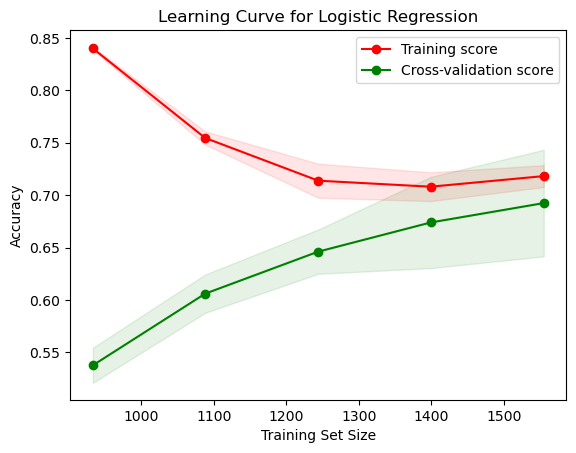

In [47]:

from sklearn.model_selection import learning_curve


logreg = LogisticRegression()

# Define training sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate the learning curve
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=logreg,
    X=X_resampled,
    y=y_resampled,
    train_sizes=train_sizes,
    cv=5,
    scoring='accuracy',
    n_jobs=-1  # Use all CPU cores
)

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for validation set scores
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Plot the learning curve
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='r', alpha=0.1)
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, color='g', alpha=0.1)

plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, validation_mean, 'o-', color='g', label='Cross-validation score')

plt.title('Learning Curve for Logistic Regression')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()


In [48]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
print(confusion_matrix(y_test, clf.predict(X_test)))
print(classification_report(y_test, clf.predict(X_test)))
clf.score(X_test, y_test)*100

[[279   5]
 [ 34 266]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       284
           1       0.98      0.89      0.93       300

    accuracy                           0.93       584
   macro avg       0.94      0.93      0.93       584
weighted avg       0.94      0.93      0.93       584



93.32191780821918

In [49]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Accuracy: {xgb_model.score(X_test, y_test) * 100:.2f}%')

[[276   8]
 [ 40 260]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       284
           1       0.97      0.87      0.92       300

    accuracy                           0.92       584
   macro avg       0.92      0.92      0.92       584
weighted avg       0.92      0.92      0.92       584

Accuracy: 91.78%


In [50]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)

# Predictions
y_pred = ada_model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Accuracy: {ada_model.score(X_test, y_test) * 100:.2f}%')

[[267  17]
 [ 49 251]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       284
           1       0.94      0.84      0.88       300

    accuracy                           0.89       584
   macro avg       0.89      0.89      0.89       584
weighted avg       0.89      0.89      0.89       584

Accuracy: 88.70%


In [51]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Building the ANN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

19/19 [==============================] - 0s 2ms/step
[[239  45]
 [  8 292]]
              precision    recall  f1-score   support

           0       0.97      0.84      0.90       284
           1       0.87      0.97      0.92       300

    accuracy                           0.91       584
   macro avg       0.92      0.91      0.91       584
weighted avg       0.92      0.91      0.91       584

Accuracy: 0.9092465753424658


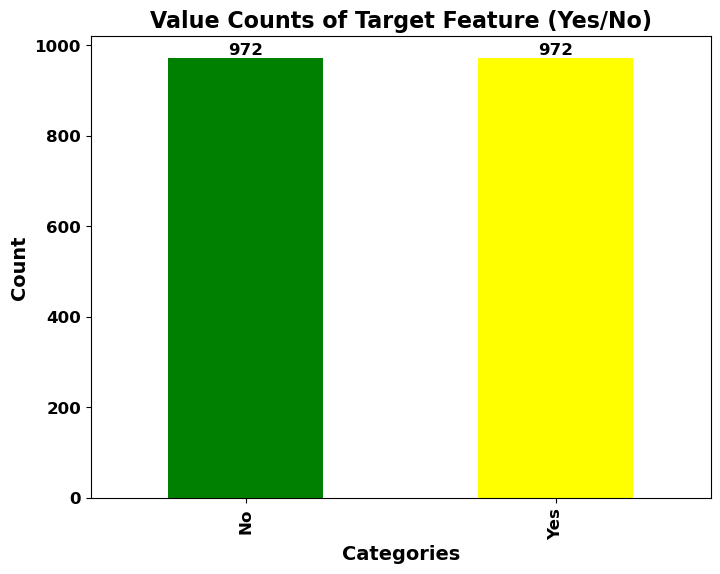

In [52]:
import matplotlib.pyplot as plt
y_resampled.replace({0: 'No', 1: 'Yes'}, inplace=True)
value_counts = y_resampled.value_counts()


plt.figure(figsize=(8, 6))  
colors = ['Green', 'yellow']  
value_counts.plot(kind='bar', color=colors)

for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12, fontweight='bold')


plt.xlabel('Categories', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Value Counts of Target Feature (Yes/No)', fontsize=16, fontweight='bold')

plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

plt.show()